In [1]:
import matplotlib.pyplot as plt
from IPython.utils import io
from game import *
from game_sim import run_the_sim, experiment_fix_order, experiment_random_order, experiment_fix_order_same_strategy

### **Parameters**
#### Set player list, strategy list, and number of simulation

In [2]:
# Parameters
player_list = ["Player1", "Player2", "Player3", "Player4", "Player5"]
strategies = ["strategy_1", "strategy_2", "strategy_3", "strategy_4", "strategy_5"]
num_games = 10000

### **Plotting Functions**
#### 1. Simulation win count bar plot
#### 2. Convergence line chart (win ratio per 100 games)

In [3]:
# Helper function to plot the results
def plot_simulation_results(title, win_counts):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(win_counts.keys(), win_counts.values(), color='green', edgecolor='black')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

    plt.title(title, fontsize=14)
    plt.xlabel("Players", fontsize=12)
    plt.ylabel("Wins", fontsize=12)
    plt.xticks(rotation=45)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [4]:
# convergence line chart plotting function
def plot_convergence(title, cum_wins, intervals):
    plt.figure(figsize=(12, 8))
    for player, percentages in cum_wins.items():
        plt.plot(intervals, percentages, label=player)

    plt.title(title, fontsize=14)
    plt.xlabel("Total Number of Games Played", fontsize=12)
    plt.ylabel("Win Percentage", fontsize=12)
    plt.legend(title="Players", fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

### **Run the Experiments**
#### Experiment 1: Fixed order with different strategy (Vanilla)
#### Experiment 2: Random order with different strategy
#### Experiment 3: Fixed order with same strategy (able to change strategy)
**IPython's capture_output() function was used in this cell to suppress the excessive print outputs (referred to: https://pieriantraining.com/jupyter-notebook-output-suppression-a-tutorial/)**

In [5]:
# Experiment 1: Vanilla Experiment (fixed order + different strategy)
with io.capture_output():  # Referred to a website to prevent jupyter from printing
    win_counts_1, tie_count_1 = experiment_fix_order(player_list, strategies, num_games)
    cum_wins_1 = {player: [] for player in player_list}
    intervals = range(100, num_games + 1, 100)
    current_win_counts_1 = {player: 0 for player in player_list}
    
    for total_games in range(1, num_games + 1):
        players = create_players(player_list, strategies)
        game = Game(players)
        winner = run_the_sim(game)
    
        if winner in current_win_counts_1:
            current_win_counts_1[winner] += 1
    
        if total_games in intervals:
            for player in player_list:
                current_win_percentage = (current_win_counts_1[player] / total_games) * 100
                cum_wins_1[player].append(current_win_percentage)

# Experiment 2: Randomized Order
with io.capture_output():
    win_counts_2, tie_count_2 = experiment_random_order(player_list, strategies, num_games)
    cum_wins_2 = {player: [] for player in player_list}
    current_win_counts_2 = {player: 0 for player in player_list}
    
    for total_games in range(1, num_games + 1):
        players = create_players(player_list, strategies)
        random.shuffle(players)
        game = Game(players)
        winner = run_the_sim(game)
    
        if winner in current_win_counts_2:
            current_win_counts_2[winner] += 1
    
        if total_games in intervals:
            for player in player_list:
                current_win_percentage = (current_win_counts_2[player] / total_games) * 100
                cum_wins_2[player].append(current_win_percentage)

# Experiment 3: Fixed Order with the Same Strategy
with io.capture_output():
    same_strategy = "strategy_1" # change strategy here
    win_counts_3, tie_count_3 = experiment_fix_order_same_strategy(player_list, same_strategy, num_games)
    cum_wins_3 = {player: [] for player in player_list}
    current_win_counts_3 = {player: 0 for player in player_list}
    
    for total_games in range(1, num_games + 1):
        players = create_players(player_list, same_strategy * len(player_list))
        game = Game(players)
        winner = run_the_sim(game)
    
        if winner in current_win_counts_3:
            current_win_counts_3[winner] += 1
    
        if total_games in intervals:
            for player in player_list:
                current_win_percentage = (current_win_counts_3[player] / total_games) * 100
                cum_wins_3[player].append(current_win_percentage)

### **Plot Experiment Results**

#### **1. Bar Chart - Win Count**

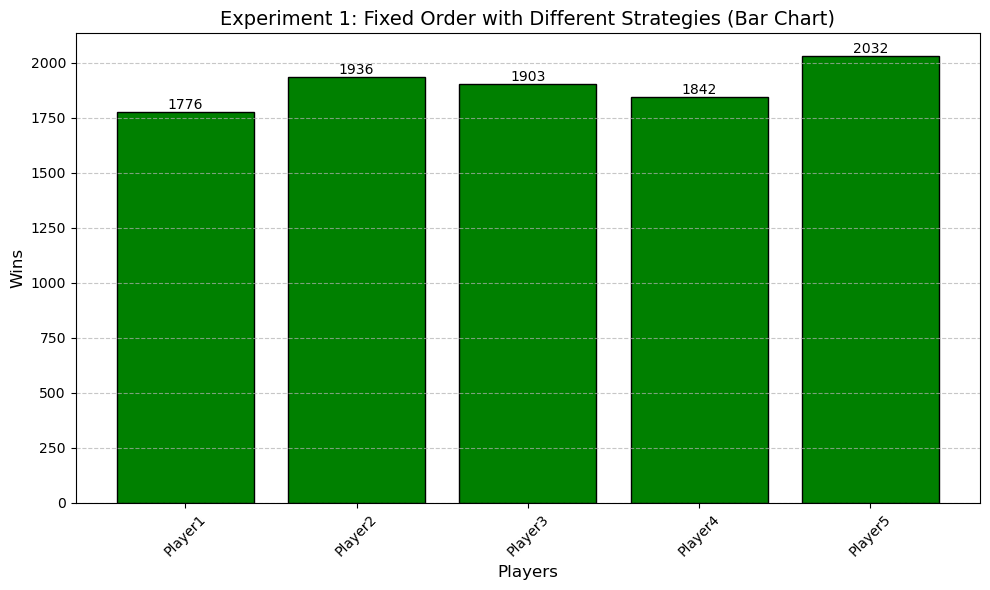

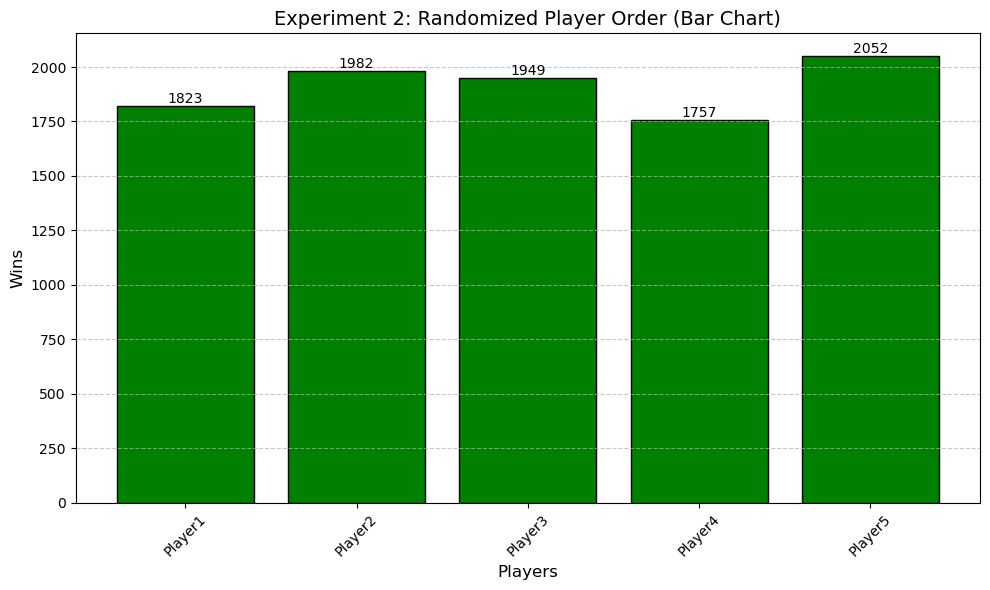

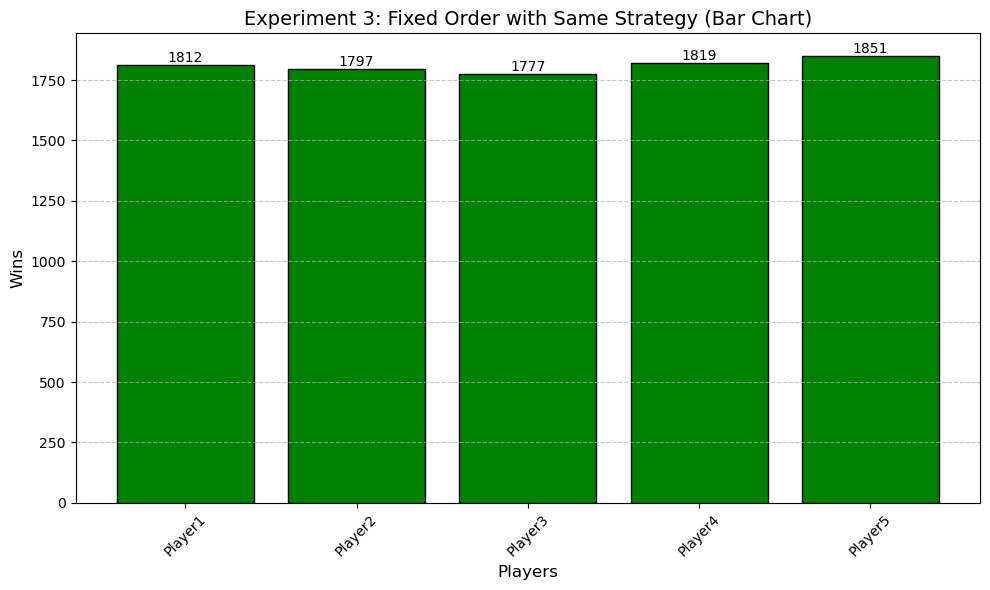

In [6]:
# Experiment 1: Vanilla Experiment (fixed order + different strategy)
plot_simulation_results("Experiment 1: Fixed Order with Different Strategies (Bar Chart)", win_counts_1)
# Experiment 2: Randomized Order
plot_simulation_results("Experiment 2: Randomized Player Order (Bar Chart)", win_counts_2)
# Experiment 3: Fixed Order with the Same Strategy
plot_simulation_results("Experiment 3: Fixed Order with Same Strategy (Bar Chart)", win_counts_3)

#### **2. Convergence Line Chart (per 100 games)**

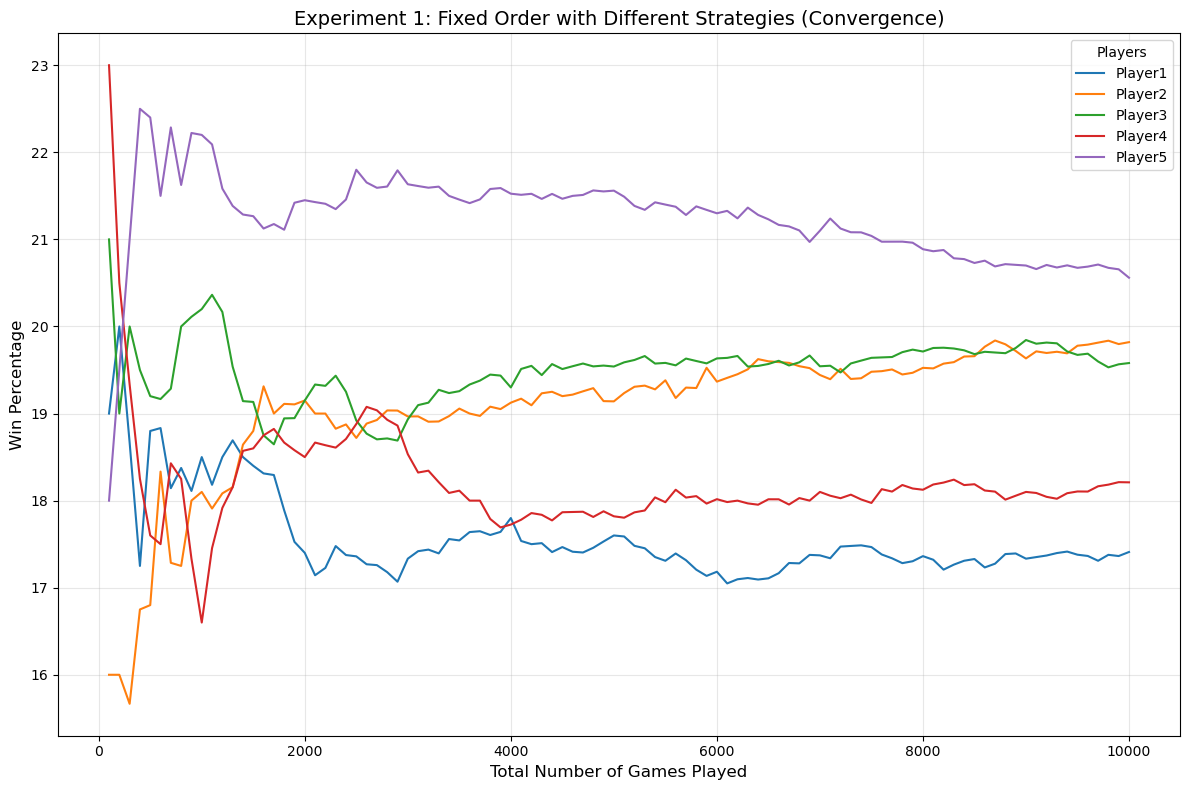

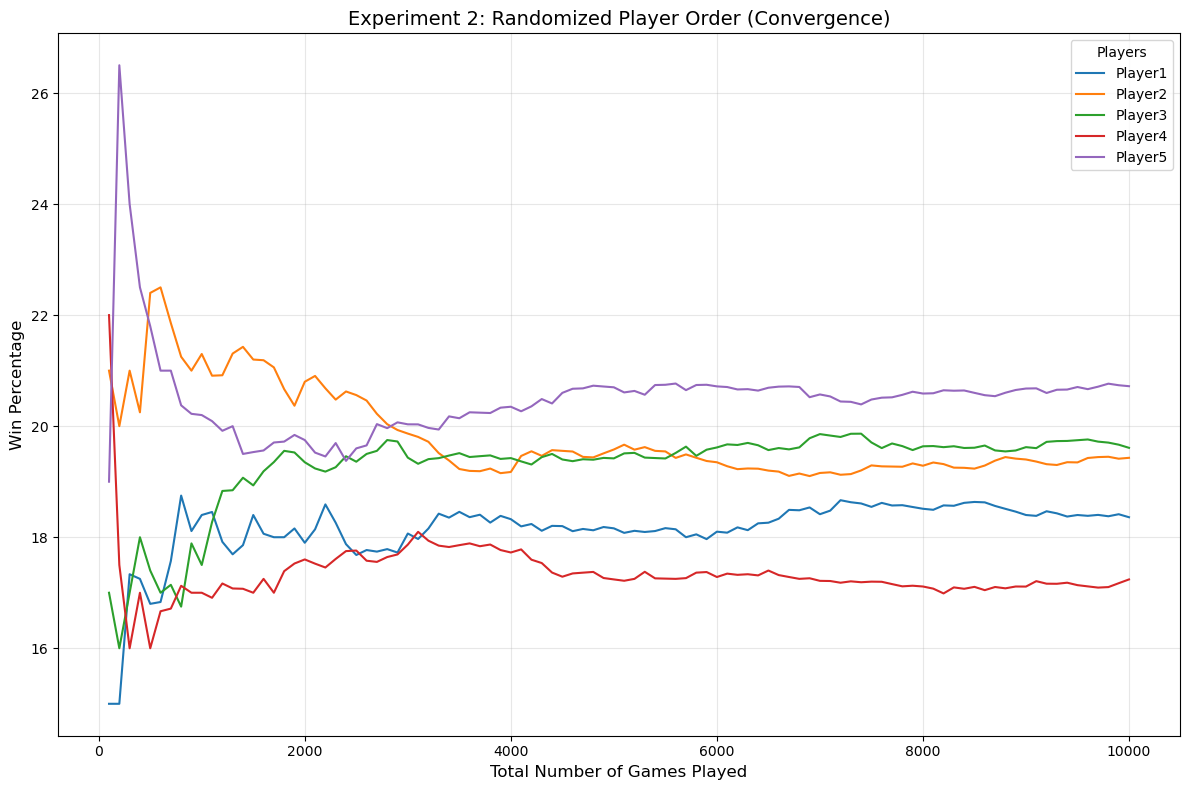

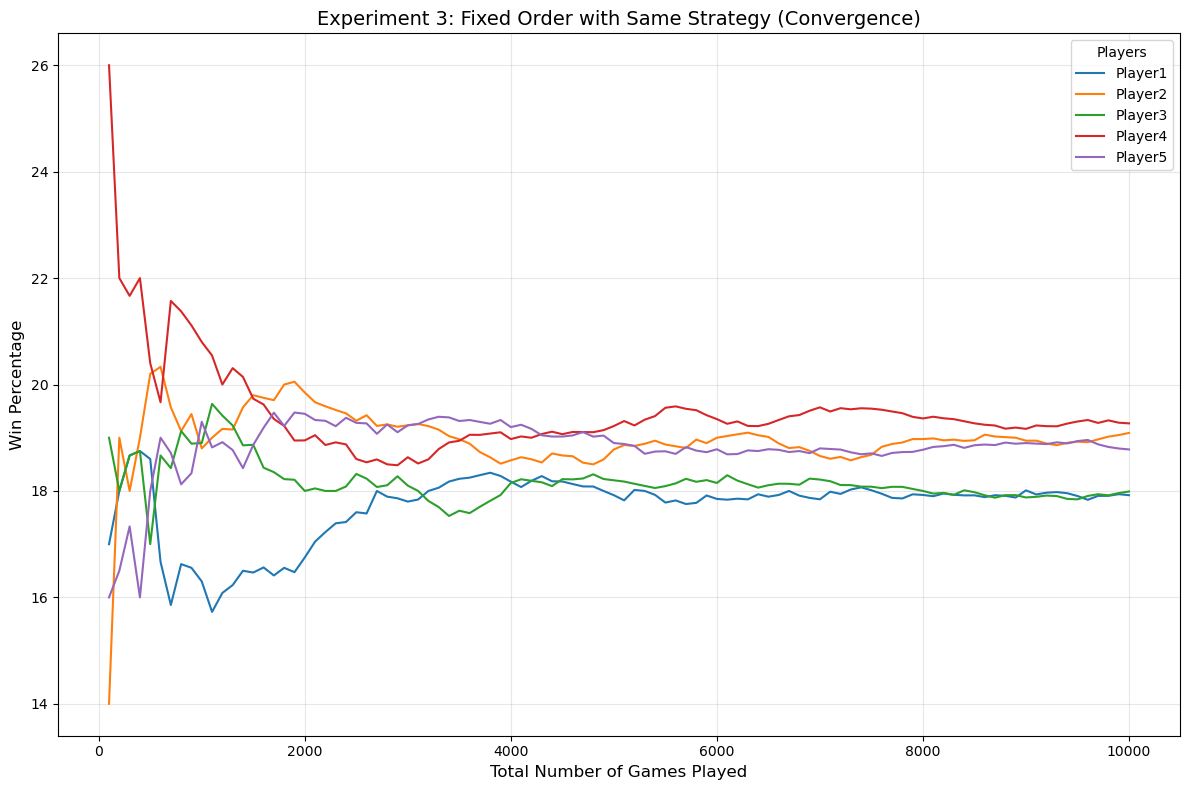

In [7]:
# Experiment 1: Vanilla Experiment (fixed order + different strategy)
plot_convergence("Experiment 1: Fixed Order with Different Strategies (Convergence)", cum_wins_1, intervals)
# Experiment 2: Randomized Order
plot_convergence("Experiment 2: Randomized Player Order (Convergence)", cum_wins_2, intervals)
# Experiment 3: Fixed Order with the Same Strategy
plot_convergence("Experiment 3: Fixed Order with Same Strategy (Convergence)", cum_wins_3, intervals)